In [1]:
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.linear_model import LassoCV, RidgeCV

In [3]:
df = pd.read_csv('housing.csv')
df

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,sub_area,area_m,...,metro_min_walk,metro_km_walk,mkad_km,kremlin_km,green_part_1000,prom_part_1000,office_count_1000,trc_count_1000,leisure_count_1000,price_doc
0,38,18.0,1.0,14.0,panel,1971.0,1.0,9.0,Dmitrovskoe,7.126815e+06,...,27.084184,2.257015,2.442781,14.856442,17.16,10.33,2,4,0,5150000
1,41,17.0,14.0,16.0,panel,1978.0,1.0,10.0,Savelovskoe,2.641243e+06,...,13.719174,1.143264,11.528984,5.323699,0.90,39.48,17,3,0,5980000
2,41,20.0,11.0,14.0,panel,1989.0,1.0,8.0,Krjukovo,1.084231e+07,...,276.453594,23.037800,20.828299,38.988909,7.54,6.64,0,2,0,4600000
3,38,19.0,6.0,17.0,panel,1986.0,1.0,8.0,Brateevo,7.587523e+06,...,14.085660,1.173805,2.885041,14.921056,24.97,0.00,0,5,0,5650000
4,58,37.0,3.0,9.0,panel,1968.0,3.0,6.0,Novogireevo,4.395333e+06,...,5.455795,0.454650,1.920884,11.812614,3.46,5.41,0,4,4,9300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8889,51,32.0,3.0,12.0,breezeblock,1974.0,2.0,9.0,Pechatniki,1.844581e+07,...,17.320003,1.443334,6.756490,9.929204,13.61,4.32,1,0,0,8300000
8890,76,45.0,6.0,16.0,panel,2001.0,3.0,10.0,Mar'ino,1.175477e+07,...,23.956840,1.996403,3.393475,13.991498,19.97,0.00,0,5,0,12800000
8891,78,43.0,15.0,17.0,panel,2002.0,3.0,13.0,Severnoe Butovo,8.889467e+06,...,3.497793,0.291483,1.056678,19.965501,20.83,0.00,0,7,0,15500000
8892,54,28.0,7.0,16.0,breezeblock,1975.0,2.0,12.0,Ivanovskoe,1.020722e+07,...,30.095498,2.507958,0.795735,13.120257,26.06,0.16,0,2,0,8350000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8894 entries, 0 to 8893
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   full_sq             8894 non-null   int64  
 1   life_sq             8894 non-null   float64
 2   floor               8894 non-null   float64
 3   max_floor           8894 non-null   float64
 4   material            8894 non-null   object 
 5   build_year          8859 non-null   float64
 6   num_room            8894 non-null   float64
 7   kitch_sq            8894 non-null   float64
 8   sub_area            8894 non-null   object 
 9   area_m              8894 non-null   float64
 10  green_zone_part     8894 non-null   float64
 11  indust_part         8894 non-null   float64
 12  preschool           8894 non-null   int64  
 13  school              8894 non-null   int64  
 14  healthcare          8894 non-null   int64  
 15  shopping            8894 non-null   int64  
 16  office

In [5]:
df.isna().sum() #количество пропусков незначительно, можно их удалить

full_sq                0
life_sq                0
floor                  0
max_floor              0
material               0
build_year            35
num_room               0
kitch_sq               0
sub_area               0
area_m                 0
green_zone_part        0
indust_part            0
preschool              0
school                 0
healthcare             0
shopping               0
office                 0
radiation              0
detention              0
young                  0
work                   0
elder                  0
0_6_age                0
7_14_age               0
metro_min_avto         0
metro_km_avto          0
metro_min_walk        11
metro_km_walk         11
mkad_km                0
kremlin_km             0
green_part_1000        0
prom_part_1000         0
office_count_1000      0
trc_count_1000         0
leisure_count_1000     0
price_doc              0
dtype: int64

In [6]:
df = df.dropna().reset_index(drop= True)
df

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,sub_area,area_m,...,metro_min_walk,metro_km_walk,mkad_km,kremlin_km,green_part_1000,prom_part_1000,office_count_1000,trc_count_1000,leisure_count_1000,price_doc
0,38,18.0,1.0,14.0,panel,1971.0,1.0,9.0,Dmitrovskoe,7.126815e+06,...,27.084184,2.257015,2.442781,14.856442,17.16,10.33,2,4,0,5150000
1,41,17.0,14.0,16.0,panel,1978.0,1.0,10.0,Savelovskoe,2.641243e+06,...,13.719174,1.143264,11.528984,5.323699,0.90,39.48,17,3,0,5980000
2,41,20.0,11.0,14.0,panel,1989.0,1.0,8.0,Krjukovo,1.084231e+07,...,276.453594,23.037800,20.828299,38.988909,7.54,6.64,0,2,0,4600000
3,38,19.0,6.0,17.0,panel,1986.0,1.0,8.0,Brateevo,7.587523e+06,...,14.085660,1.173805,2.885041,14.921056,24.97,0.00,0,5,0,5650000
4,58,37.0,3.0,9.0,panel,1968.0,3.0,6.0,Novogireevo,4.395333e+06,...,5.455795,0.454650,1.920884,11.812614,3.46,5.41,0,4,4,9300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8843,51,32.0,3.0,12.0,breezeblock,1974.0,2.0,9.0,Pechatniki,1.844581e+07,...,17.320003,1.443334,6.756490,9.929204,13.61,4.32,1,0,0,8300000
8844,76,45.0,6.0,16.0,panel,2001.0,3.0,10.0,Mar'ino,1.175477e+07,...,23.956840,1.996403,3.393475,13.991498,19.97,0.00,0,5,0,12800000
8845,78,43.0,15.0,17.0,panel,2002.0,3.0,13.0,Severnoe Butovo,8.889467e+06,...,3.497793,0.291483,1.056678,19.965501,20.83,0.00,0,7,0,15500000
8846,54,28.0,7.0,16.0,breezeblock,1975.0,2.0,12.0,Ivanovskoe,1.020722e+07,...,30.095498,2.507958,0.795735,13.120257,26.06,0.16,0,2,0,8350000


In [7]:
df.duplicated().sum()

42

In [8]:
df.loc[df.duplicated()]

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,sub_area,area_m,...,metro_min_walk,metro_km_walk,mkad_km,kremlin_km,green_part_1000,prom_part_1000,office_count_1000,trc_count_1000,leisure_count_1000,price_doc
308,46,28.0,1.0,9.0,panel,1968.0,2.0,5.0,Severnoe Medvedkovo,5.725729e+06,...,9.608767,0.800731,0.740340,15.126496,11.68,16.84,1,0,0,3000000
828,70,39.0,6.0,40.0,mass concrete,2012.0,2.0,4.0,Sokol,3.496890e+06,...,19.953545,1.662795,7.677885,9.031685,2.75,21.87,12,4,0,8070000
1203,65,44.0,4.0,12.0,panel,1973.0,3.0,9.0,Sokolinaja Gora,7.905261e+06,...,2.864861,0.238738,6.317802,8.464939,15.17,0.43,3,2,0,12000000
1628,67,46.0,2.0,5.0,panel,1961.0,3.0,8.0,Vostochnoe Izmajlovo,3.799999e+06,...,18.538619,1.544885,1.754192,13.148569,5.38,0.00,0,2,0,3000000
1867,72,43.0,12.0,17.0,panel,1992.0,3.0,10.0,Juzhnoe Tushino,7.887684e+06,...,33.694863,2.807905,0.454026,16.184920,23.13,32.01,4,2,0,10900000
2115,53,30.0,12.0,12.0,panel,1982.0,2.0,8.0,Nagatinskij Zaton,9.589337e+06,...,32.944403,2.745367,8.179227,9.256497,7.70,14.36,0,1,0,7500000
2129,40,18.0,13.0,15.0,brick,1973.0,1.0,8.0,Caricyno,8.287309e+06,...,3.943454,0.328621,6.277043,13.097704,5.80,5.57,0,1,0,7050000
2143,72,43.0,12.0,17.0,panel,1992.0,3.0,10.0,Juzhnoe Tushino,7.887684e+06,...,33.694863,2.807905,0.454026,16.184920,23.13,32.01,4,2,0,10900000
2272,37,17.0,14.0,25.0,mass concrete,2003.0,1.0,10.0,Butyrskoe,5.027634e+06,...,2.581124,0.215094,9.067890,7.585965,5.01,11.41,0,2,0,9400000
2400,53,32.0,11.0,17.0,panel,2009.0,2.0,9.0,Novo-Peredelkino,8.591335e+06,...,30.188386,2.515699,5.760711,20.250885,0.81,0.33,0,0,0,8200000


In [9]:
#удаляем дубликаты
df.drop_duplicates(inplace=True)

<AxesSubplot:>

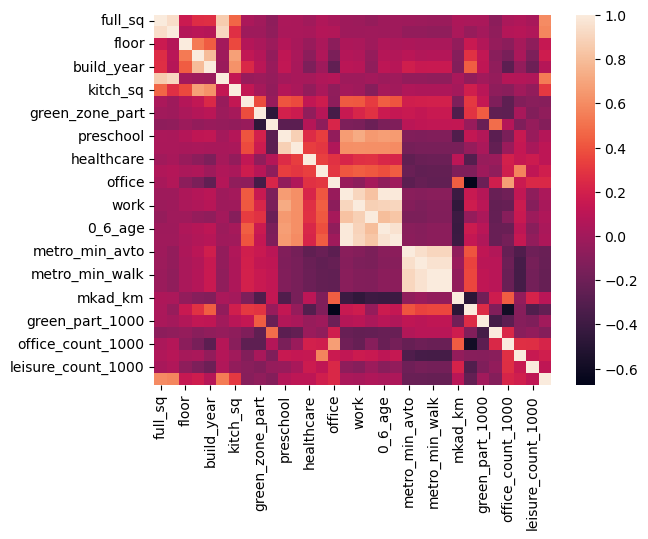

In [10]:
sns.heatmap(df.corr(method='spearman'))

In [11]:
df.corr(method='spearman')

,full_sq,life_sq,floor,max_floor,build_year,num_room,kitch_sq,area_m,green_zone_part,indust_part,...,metro_min_walk,metro_km_walk,mkad_km,kremlin_km,green_part_1000,prom_part_1000,office_count_1000,trc_count_1000,leisure_count_1000,price_doc
full_sq,1.000000,0.935498,0.161915,0.258133,0.267017,0.857774,0.458445,0.036306,-0.003469,-0.072353,...,-0.028193,-0.028193,0.044695,0.033432,0.030745,-0.079704,0.035189,0.056337,0.026314,0.600034
life_sq,0.935498,1.000000,0.070904,0.088153,0.074970,0.912124,0.269650,-0.018545,-0.018988,-0.065774,...,-0.065989,-0.065989,0.037512,-0.039671,0.012469,-0.066862,0.071628,0.080253,0.056598,0.579881
floor,0.161915,0.070904,1.000000,0.533557,0.425610,0.004844,0.365819,0.067050,0.037789,-0.023486,...,0.028175,0.028175,-0.061727,0.150764,0.063858,-0.046415,-0.084537,0.018692,-0.073672,0.143308
max_floor,0.258133,0.088153,0.533557,1.000000,0.796333,-0.014410,0.679701,0.124154,0.067274,-0.056026,...,0.066755,0.066755,-0.104970,0.278666,0.121451,-0.093232,-0.162677,0.029508,-0.138421,0.171394
build_year,0.267017,0.074970,0.425610,0.796333,1.000000,-0.028202,0.621505,0.239928,0.092771,-0.037869,...,0.155940,0.155940,-0.121007,0.431827,0.111968,-0.071040,-0.269722,-0.058116,-0.203486,0.074697
num_room,0.857774,0.912124,0.004844,-0.014410,-0.028202,1.000000,0.129318,-0.036075,-0.020000,-0.047528,...,-0.065514,-0.065514,0.032886,-0.059111,-0.005597,-0.048457,0.075128,0.068226,0.053630,0.537090
kitch_sq,0.458445,0.269650,0.365819,0.679701,0.621505,0.129318,1.000000,0.126980,0.014565,-0.059127,...,0.045379,0.045379,0.007864,0.188476,0.090085,-0.073154,-0.093923,-0.003357,-0.059878,0.307097
area_m,0.036306,-0.018545,0.067050,0.124154,0.239928,-0.036075,0.126980,1.000000,0.375628,-0.038416,...,0.202888,0.202888,-0.140760,0.302324,0.137368,-0.132690,-0.266573,-0.122011,-0.093574,-0.098309
green_zone_part,-0.003469,-0.018988,0.037789,0.067274,0.092771,-0.020000,0.014565,0.375628,1.000000,-0.469809,...,0.156188,0.156188,-0.325376,0.287677,0.425143,-0.255202,-0.261534,0.020702,-0.121023,-0.069160
indust_part,-0.072353,-0.065774,-0.023486,-0.056026,-0.037869,-0.047528,-0.059127,-0.038416,-0.469809,1.000000,...,0.120927,0.120927,0.130452,-0.037651,-0.221175,0.489291,0.066128,-0.135007,-0.045586,-0.113575


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8806 entries, 0 to 8847
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   full_sq             8806 non-null   int64  
 1   life_sq             8806 non-null   float64
 2   floor               8806 non-null   float64
 3   max_floor           8806 non-null   float64
 4   material            8806 non-null   object 
 5   build_year          8806 non-null   float64
 6   num_room            8806 non-null   float64
 7   kitch_sq            8806 non-null   float64
 8   sub_area            8806 non-null   object 
 9   area_m              8806 non-null   float64
 10  green_zone_part     8806 non-null   float64
 11  indust_part         8806 non-null   float64
 12  preschool           8806 non-null   int64  
 13  school              8806 non-null   int64  
 14  healthcare          8806 non-null   int64  
 15  shopping            8806 non-null   int64  
 16  office

In [13]:
df.columns

Index(['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year',
       'num_room', 'kitch_sq', 'sub_area', 'area_m', 'green_zone_part',
       'indust_part', 'preschool', 'school', 'healthcare', 'shopping',
       'office', 'radiation', 'detention', 'young', 'work', 'elder', '0_6_age',
       '7_14_age', 'metro_min_avto', 'metro_km_avto', 'metro_min_walk',
       'metro_km_walk', 'mkad_km', 'kremlin_km', 'green_part_1000',
       'prom_part_1000', 'office_count_1000', 'trc_count_1000',
       'leisure_count_1000', 'price_doc'],
      dtype='object')

In [14]:
#сначала попробуем ручной отбор факторов в модель
#разделяем данные на признаки
x = df[['full_sq', 'life_sq', 'floor', 'max_floor',
       'num_room', 'kitch_sq', 'area_m', 'green_zone_part',
       'indust_part', 'preschool', 'school', 'healthcare', 'shopping',
       'office', 'young', 'work', 'elder', '0_6_age',
       '7_14_age', 'metro_min_avto', 'metro_km_avto', 'metro_min_walk',
       'metro_km_walk', 'mkad_km', 'kremlin_km', 'green_part_1000',
       'prom_part_1000', 'office_count_1000', 'trc_count_1000',
       'leisure_count_1000']]
y = df['price_doc']

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

In [16]:
scaler = StandardScaler()
x_train_st = scaler.fit_transform(x_train)

In [17]:
# создадим модель линейной регрессии
model = LinearRegression()

# обучим нашу модель
model.fit(x_train_st, y_train)

print(model.coef_, model.intercept_)

[ 4.37798405e+06 -1.01704564e+06  1.12027592e+05 -1.48835187e+05
 -2.71228813e+05  3.48501532e+05 -3.00503552e+05 -1.60573197e+05
 -1.67395400e+05  3.97432635e+05 -1.50754004e+05  2.12519542e+04
  6.32289596e+04  4.45760288e+03 -1.06877512e+07 -4.99484492e+05
  5.56234966e+05  4.41541083e+06  6.22927392e+06 -1.98839992e+05
  7.66032745e+05 -1.35390060e+14  1.35390060e+14  2.99948087e+05
 -1.03011470e+06  3.55869517e+04 -2.54619362e+05  3.00336152e+05
  3.56983134e+04  1.43178975e+05] 7835136.106026123


In [18]:
# Используем «стандартизатор» для тестовой выборки
x_test_st = scaler.transform(x_test)

# делаем прогнозы
predictions = model.predict(x_test_st)

In [19]:
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Среднеквадратическая ошибка (MSE):", mse)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя абсолютная ошибка (MAE):", mae)
print("Средняя абсолютная ошибка  (MAPE):", mape)
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (MSE): 8937570019531.611
Среднеквадратическая ошибка (RMSE): 2989576.896407184
Средняя абсолютная ошибка (MAE): 1972490.5839671623
Средняя абсолютная ошибка  (MAPE): 0.618544635486267
Коэффициент детерминации (R^2): 0.5603857304712534


Получилась модель с R^2 = 0.56

Теперь нужно ее улучшать

Предположительно проблема может быть в мультиколлинераности, так как очень много факторов, которые зависимы сежду собой, поэтому попробуем L1 и L2-регуляризацию.

In [20]:
#сначала модель Lasso
#from sklearn.linear_model import Lasso


# создадим модель линейной регрессии
model = Lasso()

# обучим нашу модель
model.fit(x_train_st, y_train)

print(model.coef_, model.intercept_)

[ 4378352.67082697 -1014239.05147259   111475.35613895  -146073.72582489
  -273175.94247467   345011.61911915  -293540.61763279  -171333.02039253
  -179955.59014809   474430.4591383   -208059.45389553    22173.11070212
    85320.94269277    -9707.27461943 -1553400.07669369  -552291.20425346
   518071.87550725   100276.23576694  1414989.41716869  -185878.34105446
   768940.11184831  -565015.22160983       -0.           322693.00800879
 -1037547.07311682    37978.27086266  -259617.32748294   295703.301382
    37715.21500886   138514.21621903] 7835136.105479842


C:\Users\Liza\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.085e+16, tolerance: 1.872e+13
  model = cd_fast.enet_coordinate_descent(


In [21]:
x_test_st = scaler.transform(x_test)

# делаем прогнозы
predictions = model.predict(x_test_st)

In [22]:
r2 = r2_score(y_test, predictions)

print("Коэффициент детерминации (R^2):", r2)

Коэффициент детерминации (R^2): 0.5599515864837035


Ситуация особо не изменилась

In [23]:
#from sklearn.linear_model import Ridge
#теперь попробуем Ridge

# создадим модель линейной регрессии
model = Ridge()

# обучим нашу модель
model.fit(x_train_st, y_train)

print(model.coef_, model.intercept_)

[ 4364272.16866687 -1003280.55400769   111695.04804901  -145539.09672329
  -271913.76321227   348185.73292746  -293678.14490209  -169963.66771219
  -178177.53148567   465793.69659512  -199866.9720055     22655.78783308
    83061.91009932    -8581.91218092 -2752943.67587248  -548642.52043478
   522442.91336615   659489.32749207  2055421.99416365  -185020.82318728
   758444.60313718  -276676.07158203  -276676.03799805   319943.46601489
 -1035729.17560686    37673.93003944  -259023.75582654   296431.92619381
    37167.98101891   139078.635163  ] 7835136.105479841


In [24]:
x_test_st = scaler.transform(x_test)

# делаем прогнозы
predictions = model.predict(x_test_st)

In [25]:
r2 = r2_score(y_test, predictions)

print("Коэффициент детерминации (R^2):", r2)

Коэффициент детерминации (R^2): 0.5600667258699552


Нет, гипотеза не подтвердилась, значит нужно пробовать другие варинты улучшения.

In [26]:
#попробуем оставить меньше признаков, только те, у которых корреляция выше всего
x = df[['full_sq', 
        'life_sq',
        'num_room']]
y = df['price_doc']

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

scaler = StandardScaler()
x_train_st = scaler.fit_transform(x_train)

model = LinearRegression()

# обучим нашу модель
model.fit(x_train_st, y_train)

print(model.coef_, model.intercept_)

[4323246.24618753 -553019.93106948 -374389.05267016] 7835136.105479842


In [28]:
# Используем «стандартизатор» для тестовой выборки
x_test_st = scaler.transform(x_test)

# делаем прогнозы
predictions = model.predict(x_test_st)

In [29]:
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Среднеквадратическая ошибка (MSE):", mse)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя абсолютная ошибка (MAE):", mae)
print("Средняя абсолютная ошибка  (MAPE):", mape)
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (MSE): 11140765493398.6
Среднеквадратическая ошибка (RMSE): 3337778.526714827
Средняя абсолютная ошибка (MAE): 2223445.20314929
Средняя абсолютная ошибка  (MAPE): 0.6737670629634885
Коэффициент детерминации (R^2): 0.45201665848004624


Нужно пробовать другие варинты. Пока лучшая модель самая первая линейной регрессии с R^2=0,56

In [30]:
#price_doc регрессия - получить лучшее 